# Netflix Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

## Data Preprossesing

In [5]:
df.duplicated().sum()

0

### Basic Statistics

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df.describe().round()

,Popularity,Vote_Count,Vote_Average
count,9827.0,9827.0,9827.0
mean,40.0,1393.0,6.0
std,109.0,2611.0,1.0
min,13.0,0.0,0.0
25%,16.0,146.0,6.0
50%,21.0,444.0,6.0
75%,35.0,1376.0,7.0
max,5084.0,31077.0,10.0


### Preprosessing The Date

In [38]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [ ]:
# df['Release_Date']=pd.to_datetime(df['Release_Date'])
# print(df['Release_Date'].dtypes)

In [39]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Droping The Column

In [11]:
cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [13]:
def categorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges, labels= labels, duplicates='drop')
    return df

In [14]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [16]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [17]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

### Spliting the Genre

In [18]:
df['Genre']=df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [19]:
#casting Categories into Column

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [20]:
df.info

<bound method DataFrame.info of        Release_Date                                 Title  Popularity  \
0              2021               Spider-Man: No Way Home    5083.954   
1              2021               Spider-Man: No Way Home    5083.954   
2              2021               Spider-Man: No Way Home    5083.954   
3              2022                            The Batman    3827.658   
4              2022                            The Batman    3827.658   
...             ...                                   ...         ...   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
0            8940      popular           

In [21]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [22]:
sns.set_style('whitegrid')

## 1. What is the Most Frequent Genre of movies released on Netflix?

In [23]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

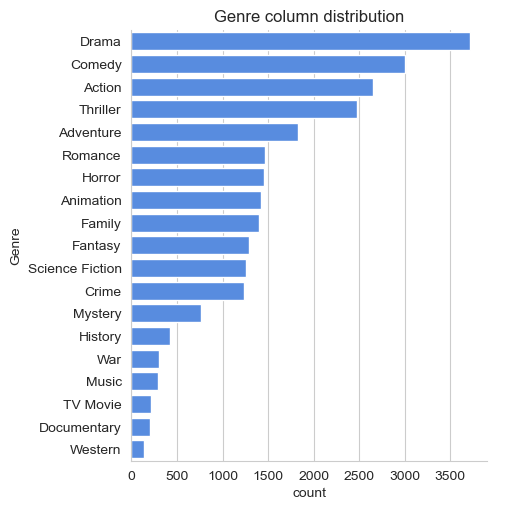

In [24]:
sns.catplot(y= 'Genre',data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

## 2. Which has highest votes in vote avg column?

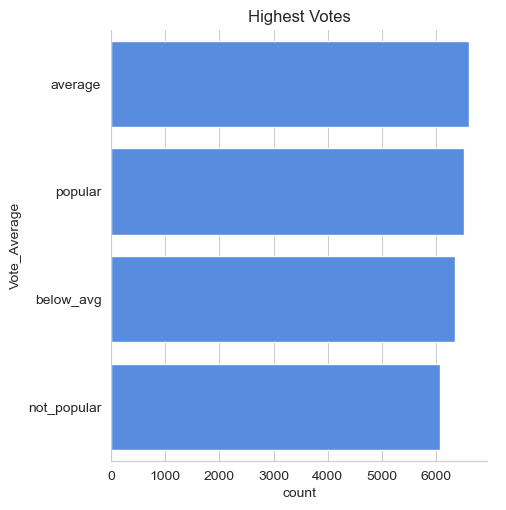

In [25]:
sns.catplot(y= 'Vote_Average' , data = df,kind='count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Highest Votes')
plt.show()

In [26]:
# sns.catplot(y='Vote_Average'data=df,kind = 'count',
#             order =df['Vote_Average'].value_counts().index
#             color='#4287f5'
# )

## 3. Which Movie got the highest popularity? What's its Genre?

In [28]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## 4. Which Movie got the Lowest popularity? What's its Genre?

In [29]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


## Which Year has The most filmmed movies?

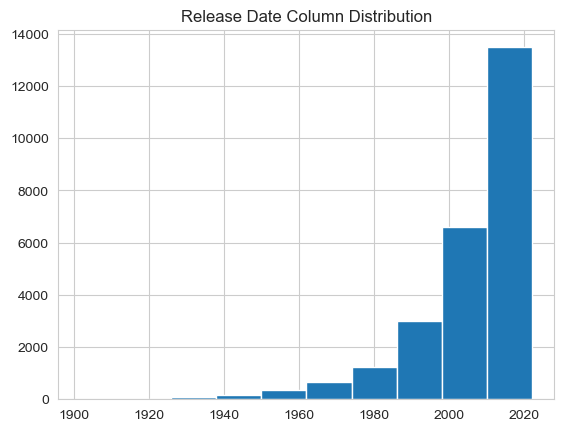

In [31]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

In [ ]:
# df['Release_Date'].hist()
# plt.title('Release Date')
# plt.show()

## Conclusion
#### Q1. 1. What is the Most Frequent Genre of movies released on Netflix?
#### -> The Drama Genre is the Most frequent in our dataset and has appeared more than 14% of the time among 19 other genres.

#### Q2. Which has the highest votes in the vote average column?
#### -> We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 18.5% of movies.

#### Q3. Which Movie got the highest popularity? What's its Genre?
#### ->  Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

#### Q4. Which Movie got the Lowest popularity? What's its Genre?
#### -> The  year 2020 has the filming rate in our dataset.